<a href="https://colab.research.google.com/github/LEESOOJAE1978/sjcu/blob/main/exe9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. 구글 드라이브 연결

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data_path = "/content/drive/My Drive/sjcu/competitive-data-science-predict-future-sales/"

1. 데이터 불러오기

In [6]:
import pandas as pd
sales_train = pd.read_csv(data_path + 'sales_train.csv')
shops = pd.read_csv(data_path + 'shops.csv')
items = pd.read_csv(data_path + 'items.csv')
item_categories = pd.read_csv(data_path + 'item_categories.csv')
test = pd.read_csv(data_path +'test.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

2. 데이터 살펴보기

In [8]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [9]:
sales_train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date            2935849 non-null  object 
 1   date_block_num  2935849 non-null  int64  
 2   shop_id         2935849 non-null  int64  
 3   item_id         2935849 non-null  int64  
 4   item_price      2935849 non-null  float64
 5   item_cnt_day    2935849 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [10]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [11]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [12]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [13]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [14]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [15]:
item_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [16]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


3. 데이터 병합하기

In [17]:
train = sales_train.merge(shops, on = 'shop_id', how = 'left')
train = train.merge(items, on ='item_id', how = 'left')
train = train.merge(item_categories, on = 'item_category_id', how = 'left')

train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства


In [19]:
def resumetable(df):
  print(f'데이터셋 형상: {df.shape}')
  summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
  summary = summary.reset_index()
  summary = summary.rename(columns = {'index':'피처'})
  summary['결측값 개수'] = df.isnull().sum().values
  summary['고윳값 개수'] = df.nunique().values
  summary['첫 번째 값'] = df.loc[0].values
  summary['두 번째 값'] = df.loc[1].values

  return summary

resumetable(train)

데이터셋 형상: (2935849, 10)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값
0,date,object,0,1034,02.01.2013,03.01.2013
1,date_block_num,int64,0,34,0,0
2,shop_id,int64,0,60,59,25
3,item_id,int64,0,21807,22154,2552
4,item_price,float64,0,19993,999.0,899.0
5,item_cnt_day,float64,0,198,1.0,1.0
6,shop_name,object,0,60,"Ярославль ТЦ ""Альтаир""","Москва ТРК ""Атриум"""
7,item_name,object,0,21807,ЯВЛЕНИЕ 2012 (BD),DEEP PURPLE The House Of Blue Light LP
8,item_category_id,int64,0,84,37,58
9,item_category_name,object,0,84,Кино - Blu-Ray,Музыка - Винил


4. 데이터 시각화


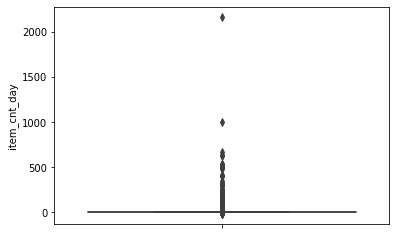

In [20]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sns.boxplot(y = 'item_cnt_day', data = train)

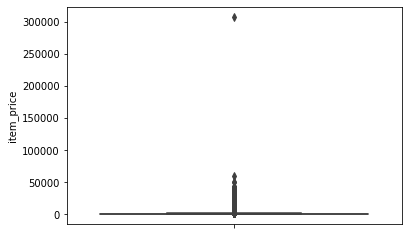

In [21]:
sns.boxplot(y = 'item_price', data = train)

In [22]:
group = train.groupby('date_block_num').agg({'item_cnt_day': 'sum'})
group.reset_index()

,date_block_num,item_cnt_day
0,0,131479.0
1,1,128090.0
2,2,147142.0
3,3,107190.0
4,4,106970.0
5,5,125381.0
6,6,116966.0
7,7,125291.0
8,8,133332.0
9,9,127541.0


[Text(0, 0.5, 'Monthly item counts'),
 Text(0.5, 0, 'Date block number'),
 Text(0.5, 1.0, 'Distribution of monthly item counts by date block number')]

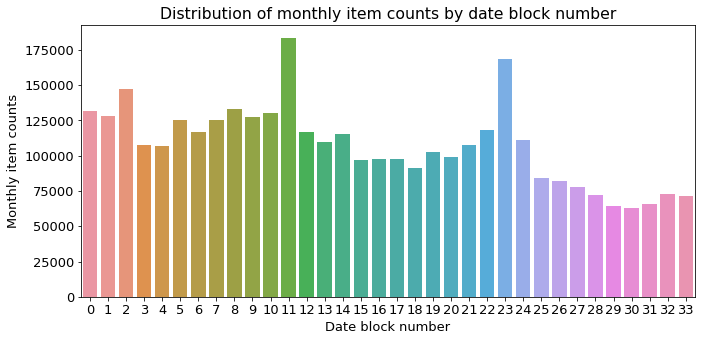

In [23]:
mpl.rc('font', size = 13)
figure, ax = plt.subplots()
figure.set_size_inches(11,5)

#월별 총 상품 판매량
group_month_sum = train.groupby('date_block_num').agg({'item_cnt_day':'sum'})
group_month_sum = group_month_sum.reset_index()

#월별 총 상품 판매량 막대 그래프
sns.barplot(x = 'date_block_num', y = 'item_cnt_day', data = group_month_sum)

#그래프 제목, x축 라벨, y 축 바벨 명 설정
ax.set(title = 'Distribution of monthly item counts by date block number',
       xlabel = 'Date block number',
       ylabel = 'Monthly item counts')

[Text(0, 0.5, 'Total item counts'),
 Text(0.5, 0, 'Item Category ID'),
 Text(0.5, 1.0, 'Distribution of total item counts by item category id')]

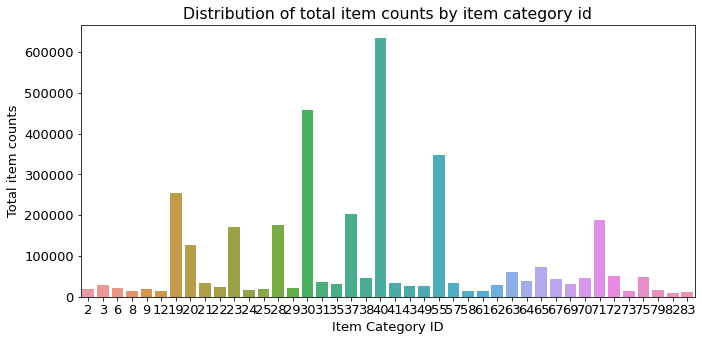

In [24]:
mpl.rc('font', size = 13)
figure, ax = plt.subplots()
figure.set_size_inches(11,5)

#상품분류별 총 상품 판매량
group_cat_sum = train.groupby('item_category_id').agg({'item_cnt_day':'sum'})
group_cat_sum = group_cat_sum.reset_index()

#월간 판매량이 10,000개를 초과하근 상품만 추출
group_cat_sum = group_cat_sum[group_cat_sum['item_cnt_day'] >10000]

#상품별 총 상품 판매량 막대 그래프
sns.barplot(x = 'item_category_id', y = 'item_cnt_day', data = group_cat_sum)

#그래프 제목, x축 라벨, y 축 바벨 명 설정
ax.set(title = 'Distribution of total item counts by item category id',
       xlabel = 'Item Category ID',
       ylabel = 'Total item counts')

[Text(0, 0.5, 'Total item counts'),
 Text(0.5, 0, 'Shop ID'),
 Text(0.5, 1.0, 'Distribution of total item counts by item shop id')]

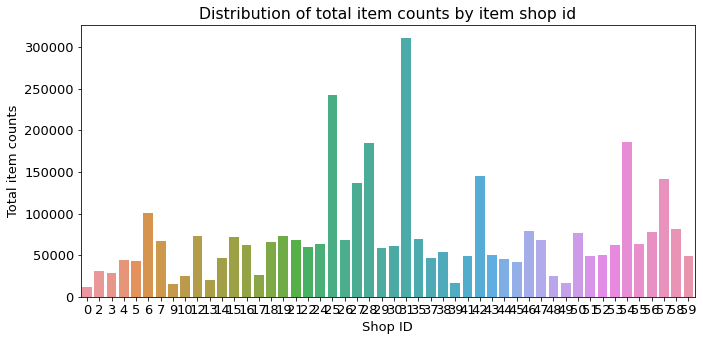

In [25]:
mpl.rc('font', size = 13)
figure, ax = plt.subplots()
figure.set_size_inches(11,5)

#상점별 총 상품 판매량
group_shop_sum = train.groupby('shop_id').agg({'item_cnt_day':'sum'})
group_shop_sum = group_shop_sum.reset_index()

#월간 판매량이 10,000개를 초과하근 상품만 추출
group_shop_sum = group_shop_sum[group_shop_sum['item_cnt_day'] >10000]

#상품별 총 상품 판매량 막대 그래프
sns.barplot(x = 'shop_id', y = 'item_cnt_day', data = group_shop_sum)

#그래프 제목, x축 라벨, y 축 바벨 명 설정
ax.set(title = 'Distribution of total item counts by item shop id',
       xlabel = 'Shop ID',
       ylabel = 'Total item counts')

피처명 한글화

In [26]:
sales_train = sales_train.rename(columns = {'date': '날짜',
                                            'date_block_num':'월ID',
                                            'shop_id':'상점ID',
                                            'item_id':'상품ID',
                                            'item_price': '판매가',
                                            'item_cnt_day' :'판매량'})

sales_train.head()

,날짜,월ID,상점ID,상품ID,판매가,판매량
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [27]:
shops = shops.rename(columns = {'shop_name':'상점명',
                                'shop_id':'상점 ID'})
shops.head()

,상점명,상점 ID
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [28]:
items = items.rename(columns = {'item_name':'상품명',
                                'item_id':'상품 ID',
                                'item_category_id':'상품분류ID'})

items.head()

,상품명,상품 ID,상품분류ID
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [29]:
item_categories = item_categories.rename(columns = 
                                         {'item_category_name':'상품분류명',
                                          'item_category_id':'상품분류ID'})
item_categories.head()

,상품분류명,상품분류ID
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [30]:
test = test.rename(columns = {'shop_id':'상점 ID',
                              'item_id':'상품 ID'})
test.head()

,ID,상점 ID,상품 ID
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [31]:
def downcast(df, verbose =True):
  start_mem = df.memory_usage().sum() / 1024**2
  for col in df.columns:
    for col in df.columns:
      dtype_name = df[col].dtype.name
      if dtype_name == 'object':
        pass
      elif dtype_name == 'bool':
        df[col] = df[col].astype('int8')
      elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
        df[col] = pd.to_numeric(df[col], downcast = 'integer')
      else:
        df[col] = pd.to_numeric(df[col], downcast ='float')
  end_mem = df.memory_usage().sum() / 1024 **2
  if verbose:
    print('{:.1f}% 압축됨'.format(100 * (start_mem - end_mem) / start_mem))

  return df

In [32]:
all_df = [sales_train, shops, items, item_categories, test]
for df in all_df:
  df = downcast(df)

62.5% 압축됨
38.6% 압축됨
54.2% 압축됨
39.9% 압축됨
70.8% 압축됨


In [33]:
from itertools import product
import numpy as np

train = []
#월 ID, 상점 ID, 상품 ID 조합 생성

for i in sales_train['월ID'].unique():
  all_shop = sales_train.loc[sales_train['월ID']==i, '상점ID'].unique()
  all_item = sales_train.loc[sales_train['월ID']==i, '상품ID'].unique()
  train.append(np.array(list(product([i], all_shop, all_item))))

idx_features = ['월ID', '상점ID', '상품ID']
train = pd.DataFrame(np.vstack(train), columns = idx_features)

train

,월ID,상점ID,상품ID
0,0,59,22154
1,0,59,2552
2,0,59,2554
3,0,59,2555
4,0,59,2564
...,...,...,...
10913845,33,21,7635
10913846,33,21,7638
10913847,33,21,7640
10913848,33,21,7632


타깃값(월간판매량) 추가

In [34]:
group = sales_train.groupby(idx_features).agg({'판매량': 'sum'})
group = group.reset_index()


In [35]:
group = group.rename(columns={'판매량':'월간판매량'})
group

,월ID,상점ID,상품ID,월간판매량
0,0,0,32,6
1,0,0,33,3
2,0,0,35,1
3,0,0,43,1
4,0,0,51,2
...,...,...,...,...
1609119,33,59,22087,6
1609120,33,59,22088,2
1609121,33,59,22091,1
1609122,33,59,22100,1


train과 병합하기

In [36]:
train

,월ID,상점ID,상품ID
0,0,59,22154
1,0,59,2552
2,0,59,2554
3,0,59,2555
4,0,59,2564
...,...,...,...
10913845,33,21,7635
10913846,33,21,7638
10913847,33,21,7640
10913848,33,21,7632


In [37]:
train = train.merge(group, on= idx_features, how='left')
train

,월ID,상점ID,상품ID,월간판매량
0,0,59,22154,1.0
1,0,59,2552,NaN
2,0,59,2554,NaN
3,0,59,2555,NaN
4,0,59,2564,NaN
...,...,...,...,...
10913845,33,21,7635,NaN
10913846,33,21,7638,NaN
10913847,33,21,7640,NaN
10913848,33,21,7632,NaN


In [38]:
len(train['월간판매량']=='NaN')

10913850

테스트 데이터 붙이기

In [39]:
test['월ID'] = 34

In [40]:
all_data = pd.concat([train, test.drop('ID', axis = 1)],
                     ignore_index =True,
                     keys = idx_features)
all_data

,월ID,상점ID,상품ID,월간판매량,상점 ID,상품 ID
0,0,59.0,22154.0,1.0,NaN,NaN
1,0,59.0,2552.0,NaN,NaN,NaN
2,0,59.0,2554.0,NaN,NaN,NaN
3,0,59.0,2555.0,NaN,NaN,NaN
4,0,59.0,2564.0,NaN,NaN,NaN
...,...,...,...,...,...,...
11128045,34,NaN,NaN,NaN,45.0,18454.0
11128046,34,NaN,NaN,NaN,45.0,16188.0
11128047,34,NaN,NaN,NaN,45.0,15757.0
11128048,34,NaN,NaN,NaN,45.0,19648.0


In [41]:
all_data = all_data.fillna(0)
all_data

,월ID,상점ID,상품ID,월간판매량,상점 ID,상품 ID
0,0,59.0,22154.0,1.0,0.0,0.0
1,0,59.0,2552.0,0.0,0.0,0.0
2,0,59.0,2554.0,0.0,0.0,0.0
3,0,59.0,2555.0,0.0,0.0,0.0
4,0,59.0,2564.0,0.0,0.0,0.0
...,...,...,...,...,...,...
11128045,34,0.0,0.0,0.0,45.0,18454.0
11128046,34,0.0,0.0,0.0,45.0,16188.0
11128047,34,0.0,0.0,0.0,45.0,15757.0
11128048,34,0.0,0.0,0.0,45.0,19648.0


최종데이터 생성

In [42]:
all_data = all_data.merge(shops, on ='상점 ID', how ='left')
all_data = all_data.merge(items, on = '상품 ID', how = 'left')
all_data = all_data.merge(item_categories, on='상품분류ID', how='left')

In [43]:
all_data

,월ID,상점ID,상품ID,월간판매량,상점 ID,상품 ID,상점명,상품명,상품분류ID,상품분류명
0,0,59.0,22154.0,1.0,0.0,0.0,"!Якутск Орджоникидзе, 56 фран",! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,40,Кино - DVD
1,0,59.0,2552.0,0.0,0.0,0.0,"!Якутск Орджоникидзе, 56 фран",! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,40,Кино - DVD
2,0,59.0,2554.0,0.0,0.0,0.0,"!Якутск Орджоникидзе, 56 фран",! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,40,Кино - DVD
3,0,59.0,2555.0,0.0,0.0,0.0,"!Якутск Орджоникидзе, 56 фран",! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,40,Кино - DVD
4,0,59.0,2564.0,0.0,0.0,0.0,"!Якутск Орджоникидзе, 56 фран",! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,40,Кино - DVD
...,...,...,...,...,...,...,...,...,...,...
11128045,34,0.0,0.0,0.0,45.0,18454.0,"Самара ТЦ ""ПаркХаус""",СБ. Союз 55,55,Музыка - CD локального производства
11128046,34,0.0,0.0,0.0,45.0,16188.0,"Самара ТЦ ""ПаркХаус""",Настольная игра Нано Кёрлинг,64,Подарки - Настольные игры
11128047,34,0.0,0.0,0.0,45.0,15757.0,"Самара ТЦ ""ПаркХаус""",НОВИКОВ АЛЕКСАНДР Новая коллекция,55,Музыка - CD локального производства
11128048,34,0.0,0.0,0.0,45.0,19648.0,"Самара ТЦ ""ПаркХаус""",ТЕРЕМ - ТЕРЕМОК сб.м/ф (Регион),40,Кино - DVD


In [44]:
all_data = downcast(all_data) #데이터 다운캐스팅

48.1% 압축됨


In [45]:
all_data = all_data.drop(['상점명', '상품명', '상품분류명'], axis=1) #문자 데이터 제거

In [46]:
all_data

,월ID,상점ID,상품ID,월간판매량,상점 ID,상품 ID,상품분류ID
0,0,59,22154,1,0,0,40
1,0,59,2552,0,0,0,40
2,0,59,2554,0,0,0,40
3,0,59,2555,0,0,0,40
4,0,59,2564,0,0,0,40
...,...,...,...,...,...,...,...
11128045,34,0,0,0,45,18454,55
11128046,34,0,0,0,45,16188,64
11128047,34,0,0,0,45,15757,55
11128048,34,0,0,0,45,19648,40


훈련, 검증, 테스트 데이터 분류




In [48]:
#훈련데이터(피처)
X_train = all_data[all_data['월ID']<33]
X_train = X_train.drop(['월간판매량'], axis=1)
#검증데이터(피처)
X_valid = all_data[all_data['월ID']==33]
X_valid = X_valid.drop(['월간판매량'], axis=1)
#테스트 데이터
X_test = all_data[all_data['월ID'] ==34]
X_test = X_test.drop(['월간판매량'], axis = 1)

#훈련데이터(타깃값)
y_train = all_data[all_data['월ID']<33]['월간판매량']
y_train = y_train.clip(0,20) #타깃값을 0~20으로 제한

#검증데이터(타깃값)
y_valid = all_data[all_data['월ID']==33]['월간판매량']
y_valid = y_valid.clip(0,20)

모델 훈련 및 성능 검증


In [49]:
import lightgbm as lgb

#LightGBM용 하이퍼파라미터

params = {'metric':'rmse',
          'num_leaves':255,
          'learning_rate':0.01,
          'force_col_wise':True,
          'random_state':10}

#범주형 피처 설정
cat_features = ['상점ID', '상품분류ID']

#LightGBM용 훈련 및 검증 데이터 셋
dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_valid, y_valid)

In [51]:
lgb_model = lgb.train(params = params,
                      train_set = dtrain, 
                      num_boost_round=500,
                      valid_sets=(dtrain, dvalid),
                      categorical_feature = cat_features, 
                      verbose_eval=50)

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['상점ID', '상품분류ID']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[50]	training's rmse: 1.19903	valid_1's rmse: 1.12196
[100]	training's rmse: 1.18795	valid_1's rmse: 1.11554
[150]	training's rmse: 1.1819	valid_1's rmse: 1.1119
[200]	training's rmse: 1.17775	valid_1's rmse: 1.10951
[250]	training's rmse: 1.17438	valid_1's rmse: 1.10777
[300]	training's rmse: 1.17165	valid_1's rmse: 1.10637
[350]	training's rmse: 1.16921	valid_1's rmse: 1.10484
[400]	training's rmse: 1.16743	valid_1's rmse: 1.1041
[450]	training's rmse: 1.16586	valid_1's rmse: 1.10343
[500]	training's rmse: 1.16425	valid_1's rmse: 1.10262


예측 및 결과 제출


In [53]:
preds = lgb_model.predict(X_test).clip(0,20)

In [54]:
preds

array([0.34322452, 0.34322452, 0.34322452, ..., 0.34322452, 0.34322452,
       0.34322452])

In [55]:
submission['item_cnt_month'] = preds
submission.to_csv('submission.csv', index=False)

In [56]:
submission

,ID,item_cnt_month
0,0,0.343225
1,1,0.343225
2,2,0.343225
3,3,0.343225
4,4,0.343225
...,...,...
214195,214195,0.343225
214196,214196,0.343225
214197,214197,0.343225
214198,214198,0.343225
